# Estimación puntual

En este notebook ejemplificaremos la mayoría de los conceptos sobre _Estadísticas y distribuciones muestrales_, y _Estimación puntual_ vistos en el curso. La intención es que este material sea autocontenido y les ayude a reforzar sus conocimientos en los temas antes mencionados.

Este notebook se encuentra alojado en [GitHub](https://github.com/ivannpy/inferencia_estadistica).

Autor: Jorge Iván Reyes Hernández.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from utils import *

np.set_printoptions(precision=2)

## Introducción

### El problema fundamental de la estadística paramétrica

Recordemos que el _problema fundamental de la estadística (inferencial) paramétrica_ es que, dada una muestra aleatoria $\underline{X} = (X_1, \dots X_n)$ de tamaño $n$ (en la práctica esto se traduce a tener $n$ números $x_1, \dots, x_n$) provenientes de algún modelo de probabilidad paramétrico, $F_{\theta}$, hay que aprender/inferir el valor $\theta \in \Theta$ que generó la muestra.

En este Notebook sólo hablaremos de la estimación puntual que, a grandes rasgos, consiste en dar un valor puntual (un único número) para este parámetro (o dar un vector de números, en caso de que tengamos más de un parámetro).

Considere el siguiente listado.

In [2]:
mu: float = 0  # Media
sigma2: float = 2  # Varianza
sigma: float = np.sqrt(sigma2)  # Desviación estándar

# Generamos una muestra aleatoria de tamaño n = 500 de una población
# Normal con media 0 y varianza 2

n: int = 500  # Tamaño de la muestra
    
random_sample = stats.norm.rvs(loc=mu, scale=sigma, size=n, random_state=0)  # Muestra aleatoria


In [3]:
random_sample

array([ 2.49,  0.57,  1.38,  3.17,  2.64, -1.38,  1.34, -0.21, -0.15,
        0.58,  0.2 ,  2.06,  1.08,  0.17,  0.63,  0.47,  2.11, -0.29,
        0.44, -1.21, -3.61,  0.92,  1.22, -1.05,  3.21, -2.06,  0.06,
       -0.26,  2.17,  2.08,  0.22,  0.53, -1.26, -2.8 , -0.49,  0.22,
        1.74,  1.7 , -0.55, -0.43, -1.48, -2.01, -2.41,  2.76, -0.72,
       -0.62, -1.77,  1.1 , -2.28, -0.3 , -1.27,  0.55, -0.72, -1.67,
       -0.04,  0.61,  0.09,  0.43, -0.9 , -0.51, -0.95, -0.51, -1.15,
       -2.44,  0.25, -0.57, -2.31,  0.65, -1.28,  0.07,  1.03,  0.18,
        1.61, -1.75,  0.57, -0.97, -1.23, -0.82, -0.44,  0.08, -1.65,
        1.27,  0.66, -2.17,  2.1 ,  2.68,  1.67, -0.25, -1.51,  1.49,
       -0.57,  1.73,  0.29,  1.38,  0.5 ,  1.  ,  0.01,  2.53,  0.18,
        0.57,  2.66, -1.91, -1.8 ,  1.37, -1.66,  2.75, -0.58, -1.06,
        2.72,  2.09,  2.64,  1.28, -1.22,  2.7 , -0.38,  1.13,  1.34,
       -0.22,  0.87,  1.3 ,  0.53, -1.55,  0.42,  1.88, -0.98, -0.21,
       -0.62,  2.62,

---
_Observación_: El método .rvs() de stats.norm genera números pseudo-aleatorios de una distribución normal. El argumento loc indica la media; scale indica la desviación estándar (es por eso que no le pasamos la varianza, sigma2); size indica el tamaño de la muestra; random_state fija una _semilla_, para obtener resultados reproducibles.

---

En el listado anterior se genera una muestra aleatoria de tamaño $n=500$ de una población $\mathcal{N}(0, 2)$. En el contexto de inferencia estadística, partimos de que conocemos la muestra pero sin conocer los parámetros. Hagamos trampa y comencemos de nuevo.

Considere el siguiente conjunto de $n=500$ números


In [4]:
print_pretty_sample(random_sample)

Realización de la muestra aleatoria.
Tamaño de la muestra: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Para poder hacer inferencia (en el contexto paramétrico) tenemos que suponer que existe un modelo de probabilidad, $F_{\theta}$, que genera los datos anteriores. La pregunta natural es ¿cuál modelo?

Para responder esta pregunta vamos a usar las herramientas de la estadística descriptiva. En otras palabras, haremos un (breve) análisis descriptivo de datos (recuerde que este paso __siempre__ antecede cualquier procedimiento de inferencia). 

Comenzamos haciendo un histograma para obtener información sobre la densidad empírica.

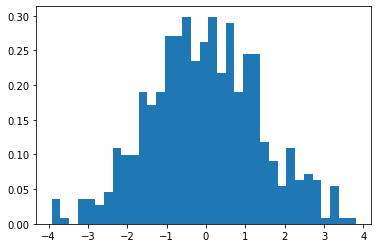

In [5]:
plt.hist(random_sample, density=True, bins=35);

Del histograma podemos observar que la densidad parece simétrica (no sesgada), se acumula alrededor de un número cercano al 0 y que aunque hay dispersión, no es grande, pues todos los valores están entre -4 y 4. Además, a ojo, ese histograma parece una densidad normal (en el curso de Estadística II verán herramientas -pruebas estadísticas- para justificar esto).

Con lo anterior, parece hacer sentido que nuestra muestra provenga de una población Normal, es decir, supondremos que tenemos la siguiente muestra aleatoria

$$
X_1, \dots, X_{500} \sim \mathcal{N}(\mu, \sigma ^{2})
$$

para algunos valores de $\mu$ y $\sigma ^{2}$ que deseamos estimar.

__Spoiler__: Como ya vimos toda la parte de inferencia, sabemos que la media muestral, $\bar{X}$, y la varianza muestral, $S^{2}$, son _buenos_ estimadores para $\mu$ y $\sigma ^{2}$, respectivamente. Con esto en mente, calculemos esos estimadores (véase la sección _Sobre cómo implementar las estadísticas_ del Notebook apéndice).


Comenzamos definiendo el estimador $T_1: \Omega \to \mathbb{R}^{2}$, dado por:

$$
\begin{align*}
    T_1(\underline{X}) &= (\bar{X}, S^{2})\\
        &= \bigg( \frac{1}{n} \sum_{i=1}^{n} X_i , \frac{1}{n-1} \sum_{i=1}^{n} (\bar{X}- X_i)^{2} \bigg)
\end{align*}
$$

Note que $T_1$ es un estimador para $\theta = (\mu, \sigma^{2})$

In [6]:
def T_1(X):
        """ Calcula la media muestral y la varianza muestral S^2.
        :param X: X es un arreglo de Numpy.
        :return: (media, s^2)
        """

        t_1 = X.mean()
        coef = 1 / (X.size - 1)
        t_2 = coef * ((X - X.mean()) ** 2).sum()
        
        return t_1, t_2

La estadística $T_1$ es, en principio, un vector aleatorio. Para obtener la realización del estimador, $t_1(\underline{x})$, hay que usar la realización de la muestra aleatoria (los números con los que empezamos) para evaluar el estimador.

In [7]:
mu_gorro, sigma2_gorro = T_1(random_sample)

In [8]:
print(mu_gorro)

-0.03585659197029378


In [9]:
print(sigma2_gorro)

1.9966271586284878


¡Sorpresa! El estimador $T_1$ estima que los valores reales de los parámetros $\mu$ y $\sigma^{2}$ son $\hat{\mu} \approx -0.03$ y $\hat{\sigma}^{2} \approx 1.99$. Estas estimaciones no están mal, pues los valores __reales__ de los parámetros son $\mu= 0$ y $\sigma^{2} = 2$.

Con estas estimaciones de los parámetros podríamos decir que el fenómeno que generó los números iniciales (los 500 números con los que partimos) es _aleatorio_ y es descrito por un modelo $\mathcal{N}(-0.03, 1.99)$. En este punto ya conocemos cuál es el modelo de probabilidad, por lo que podríamos aplicar todos los métodos que se estudian en Probabilidad I y II para hacer predicciones (por ejemplo, el valor más probable en caso de obtener/medir $x_{501}$). No es la intención de este Notebook hacerlo.

## Estimación por máxima verosimilitud

En la introducción se dio por hecho que la media muestral y la varianza muestral eran buenos estimadores para la media y la varianza, respectivamente, de una población normal, sin embargo estos estimadores se propusieron, no se construyeron. En esta sección vamos a ejemplificar el método de estimación por máxima verosimilitud desde cero.

El siguiente ejemplo aparece como el _Example 7.16_ de [1].

__Ejemplo:__ Un artículo de mayo de 2018 en www.howtogeek.com analiza los criterios tradicionales para las contraseñas "fuertes" y el consejo emergente de utilizar frases más largas concatenando varias palabras como contraseña. Supongamos que se seleccionan aleatoriamente 10 estudiantes de una determinada universidad y se comprueba que el primero, el tercero y el décimo utilizan frases largas como contraseñas de sus correos electrónicos, mientras que los otros 7 no lo hacen. Sea $p$ la proporción de estudiantes de __toda__ la universidad que utilizan frases largas como contraseñas de sus correos electrónicos. Defina las variables aleatorias $X_1, \dots, X_{10}$ tales que,

$$
X_i = 
\begin{cases} 
    1 &\text{si el i-ésimo estudiante usa una frase larga como contraseña} \\
    0 &\text{c.o.c}
\end{cases}
$$

Claramente, $X_i \sim Ber(p)$, $p \in \Theta = [0,1]$

De la información del problema sabemos que tenemos una muestra aleatoria de tamaño 10, dada por
$$
x_1 = 1, x_2=0, x_3 = 1, x_4 = 0, x_5 = 0, x_6 = 0, x_7 = 0, x_8 = 0, x_9 = 0, x_{10} = 1
$$

También tiene sentido que las variables aleatorias sean independientes, pues generalmente las personas eligen sus contraseñas sin influencia de otra persona.

La probabilidad de haber observado _exactamente_ esa muestra está dada por la función de __verosimilitud__ (a.k.a función de probabilidad conjunta),

$$
\begin{align*}
    L(p| \underline{X}) :&= \mathbb{P}(X_1 = x_1, \dots, X_{10} = x_{10}) \\
        &= f_{X_1, \dots X_{10}}(x_1, \dots x_n; p) \\ 
        &= \prod _{i=1}^{10} f_{X_i}(x_i;p) \\
        &= \prod _{i=1}^{10} p ^{x_i} (1-p)^{1-x_i}
\end{align*}
$$

Como conocemos los valores $x_i$, podemos sustituirlos en la función de verosimilitud,

$$
\begin{align*}
    L(p| \underline{x}) &= \prod _{i=1}^{10} p ^{x_i} (1-p)^{1-x_i} \\
        &= p ^{x_1} (1-p)^{1-x_1} \cdot \dots \cdot p ^{x_{10}} (1-p)^{1-x_{10}} \\
        &= p (1 - p) p (1 - p) (1 - p) (1 - p) (1 - p) (1 - p) (1 - p) p \\
        &= p^{3} (1-p)^{7}
\end{align*}
$$

Note que una vez que conocemos los valores que toma la muestra aleatoria, la función de verosimilitud únicamente es función de los parámetros.

A continuación se muestra a gráfica de $L:[0,1] \subset \mathbb{R} \to \mathbb{R}$.

In [10]:
def L_1(p, x):
    """ Implementación de la función de verosimilitud.
        
    Esta implementación admite que le pasemos un vector, x, con la muestra aleatoria, 
    por lo que es más robusta/general.
    """
    if 0 <= p <= 1:
        likelihood = 1
        for xi in x:
            likelihood *= (p ** xi)*((1 - p)**(1 - xi))  
        return likelihood
    else:
        return 0

def L(p):
    """ Implementación de la función de verosimilitud.
    
    Implementa L para los valores específicos de la muestra aleatoria.
    """
    if 0 <= p <= 1:
        return np.power(p, 3) * np.power(1 - p, 7)
    else:
        return 0


In [11]:
# Cargamos la muestra aleatoria
sample_students = load_data("ejemplo_estudiantes.csv")

# Posibles valores de p (espacio parametral)
dom = np.linspace(0, 1)

# Valores que toma la función de verosimilitud
L_plot = np.array([L(p) for p in dom])

# Valores que toma la función de verosimilitud
L_1_plot = np.array([L_1(p, sample_students) for p in dom])


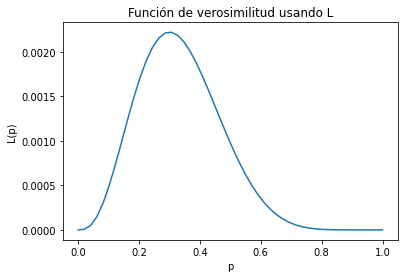

In [12]:
plt.title("Función de verosimilitud usando L")
plt.xlabel("p")
plt.ylabel("L(p)")
plt.plot(dom, L_plot);


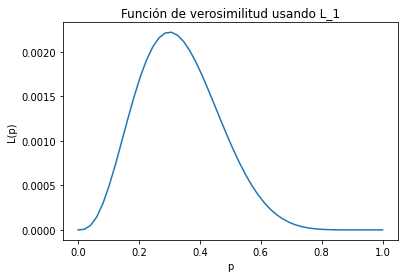

In [13]:
plt.title("Función de verosimilitud usando L_1")
plt.xlabel("p")
plt.ylabel("L(p)")
plt.plot(dom, L_1_plot);


Recordemos que el __principio de máxima verosimilitud__ nos dice que el estimador (de máxima verosimilitud) es aquel que maximiza la función de verosimilitud, $L$. 

De la gráfica anterior (que casualmente es la gráfica de $L$) podemos ver, a ojo, que el valor de $p$ que maximiza la función $L$ está cerca de 0.3. Para encontrar el valor exacto necesitamos un algoritmo que encuentre este valor máximo.

In [27]:
index_max = np.argmax(L_1_plot)
dom[index_max]

0.3061224489795918

# Referencias

[1]. Devore, Berk and Carlton. Modern Mathematical Statistics with Applications. Springer